<h2><center><strong>Describing the project

This is a project about classifying the loaf requests, so we can know it will be accepted or not the project uses this<br> 
Kaggle <strong>[data set](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).</strong><br><br>
The dat set contains random loaf requests from some bank the data set contains about <ins>614</ins> rows and <ins>11</ins> features<br>
and one target the data contains an information about the person like gender and education and contains some <br>banking information about
him like his co-applicant income and credit history.

<strong>How will we clean & augmenting the data</strong>:
<ol>
    <li><strong>Treating</strong> the NANs based on what's the column and what's it's count of "NANs"
    <li><strong>Cleaning</strong> the outliers using Z-score algorithm
    <li><strong>Scaleing</strong> the data by 2 algorithms to fit the the suitable algorithm to each ML model
    <li><strong>Encoding</strong> the categorical features using one hot encoding
    <li><strong>Optimizing</strong> the performance by down scaling all features
    <li><strong>Selecting</strong> the important columns and dropping others using feature selection

<strong>The questions we are going to answer</strong>:
<ol>
    <li>What's the general ratio of your loan request refused
    <li>What's the the correlations between the persons bank information
    <li>What's the the most categorical features that can affect loan status & it's effect on it
    <li>What's the most common things in the persons banking information

<strong>The ML models we are going to use</strong>:
<ul>
    <li>Support vector machine (SVC)
    <li>K-Neirest neighbour classifier (KNN)
    <li>Ada boost classifier
    <li>Logistec regression
    <li>Random forest classifier
    <li>Desision trees
    <li>Simple Neural network.

<h2><strong><center>Data Wragling

<h4>1- Importing the packeges

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from tensorflow                   import keras
from sklearn.linear_model         import LogisticRegression
from sklearn.pipeline             import Pipeline
from imblearn.over_sampling       import RandomOverSampler
from sklearn.ensemble             import AdaBoostClassifier
from sklearn.preprocessing        import MinMaxScaler
from sklearn.preprocessing        import StandardScaler
from sklearn_pandas               import DataFrameMapper
from sklearn.tree                 import DecisionTreeClassifier
from sklearn.ensemble             import RandomForestClassifier
from sklearn.neighbors            import KNeighborsClassifier
from sklearn.neighbors            import NeighborhoodComponentsAnalysis
from sklearn.model_selection      import train_test_split
from sklearn.linear_model         import SGDClassifier
from sklearn.svm                  import SVC
from sklearn.naive_bayes          import GaussianNB

rcParams["figure.figsize"] = 7, 6
plt.rcParams['axes.titlesize'] = 20
%matplotlib inline
sns.set_style("whitegrid")

<h4>2- Simple describing and reading the data 

In [2]:
base_df = pd.read_csv("Loaf dataset.csv",
                 encoding= "unicode_escape")

theme_colors = ["#ff8533", "#808080"]
font = 13
# We named the data frame base_df instead of df because we will need it again
# without any one hot encoding or scaling

In [3]:
base_df.sample(n= 10).style.highlight_null(null_color= theme_colors[1])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
336,LP002110,Male,Yes,1,Graduate,nan,5250,688.000000,160.000000,360.000000,1.000000,Rural,Y
383,LP002234,Male,No,0,Graduate,Yes,7167,0.000000,128.000000,360.000000,1.000000,Urban,Y
398,LP002284,Male,No,0,Not Graduate,No,3902,1666.000000,109.000000,360.000000,1.000000,Rural,Y
304,LP001978,Male,No,0,Graduate,No,4000,2500.000000,140.000000,360.000000,1.000000,Rural,Y
246,LP001814,Male,Yes,2,Graduate,No,9703,0.000000,112.000000,360.000000,1.000000,Urban,Y
215,LP001720,Male,Yes,3+,Not Graduate,No,3850,983.000000,100.000000,360.000000,1.000000,Semiurban,Y
402,LP002297,Male,No,0,Graduate,No,2500,20000.000000,103.000000,360.000000,1.000000,Semiurban,Y
48,LP001146,Female,Yes,0,Graduate,No,2645,3440.000000,120.000000,360.000000,0.000000,Urban,N
532,LP002723,Male,No,2,Graduate,No,3588,0.000000,110.000000,360.000000,0.000000,Rural,N
292,LP001940,Male,Yes,2,Graduate,No,3153,1560.000000,134.000000,360.000000,1.000000,Urban,Y


In [4]:
cm = sns.light_palette(theme_colors[0], as_cmap=True)
base_df.head().style.text_gradient(cmap=cm)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


In [5]:
print("Data columns info: \n")
base_df.info(verbose = True)

# There is some nulls we will visualie them in the next section

Data columns info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
print("Statics of numirec data: \n")

df = base_df.copy()
base_df.describe()

Statics of numirec data: 



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
base_df.shape

(614, 13)

In [8]:
base_df.duplicated().any()

False

**From this section we can conclude**:
- There are NANs in the dataframe.
- There are no duplicated rows
- The difference between max and min is too huge, which means there are outliers

<h4>3- Describing the quality issues by visualization

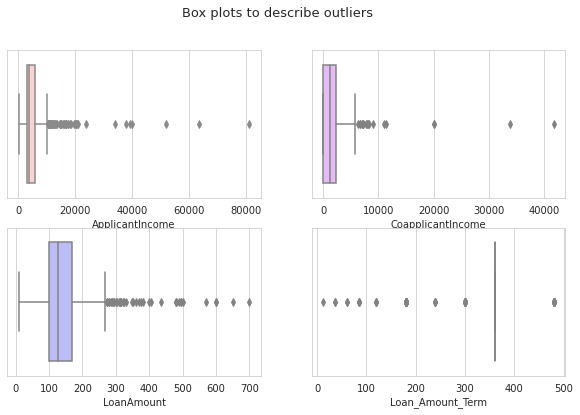

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)

sns.boxplot(x =base_df["LoanAmount"], ax = axes[1,0], color= "#b3b3ff")
sns.boxplot(x= base_df["Loan_Amount_Term"], ax = axes[1,1], color= "#b3ffd9")
sns.boxplot(x= base_df["ApplicantIncome"], ax = axes[0,0], color= "#ffcccc")
sns.boxplot(x= base_df["CoapplicantIncome"], ax = axes[0,1], color= "#e6b3ff")

fig.set_size_inches(10,6)
fig.suptitle("Box plots to describe outliers", fontsize= font)
plt.show()

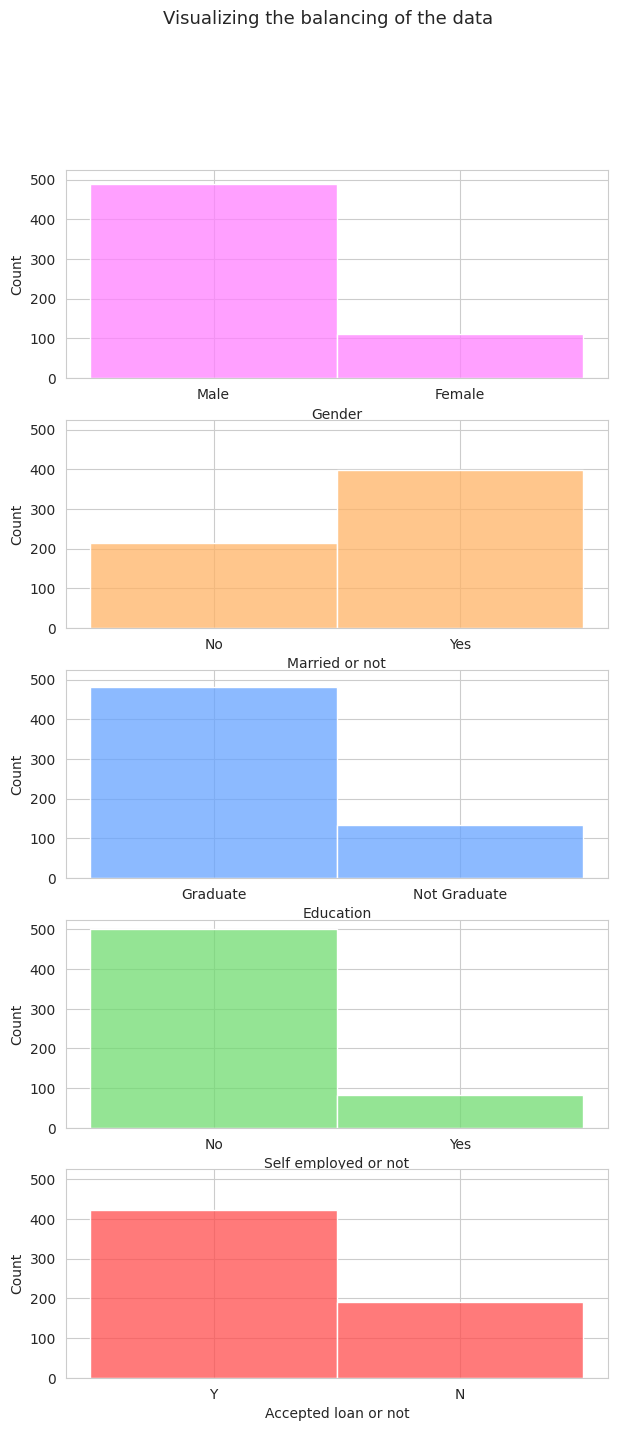

In [10]:
fig, (ax1, ax2, ax3, ax4, ax5)  = plt.subplots(5, sharey= True)

def histogram(col_name, c, data, x_label, axes):
    
    sns.histplot(x= col_name, data= base_df, ax= axes, color= c)
    axes.set_xlabel(x_label)
    axes.set_ylabel('Count')
    
    
histogram(col_name= "Gender", c= "#ff80ff", x_label= "Gender", axes = ax1, data= base_df)
histogram(col_name= "Married", c= "#ffb366", x_label= "Married or not", axes = ax2, data= base_df)
histogram(col_name= "Education", c= "#66a3ff", x_label= "Education", axes = ax3, data= base_df)
histogram(col_name= "Self_Employed", c= "#70db70", x_label= "Self employed or not", axes = ax4, data= base_df)
histogram(col_name= "Loan_Status", c= "#ff4d4d", x_label= "Accepted loan or not", axes = ax5, data= base_df)

fig.set_size_inches(7,16)
fig.set_dpi(100)
fig.suptitle("Visualizing the balancing of the data", fontsize= font)

plt.show()

The data is not very balanced so we will random over sample it
later.

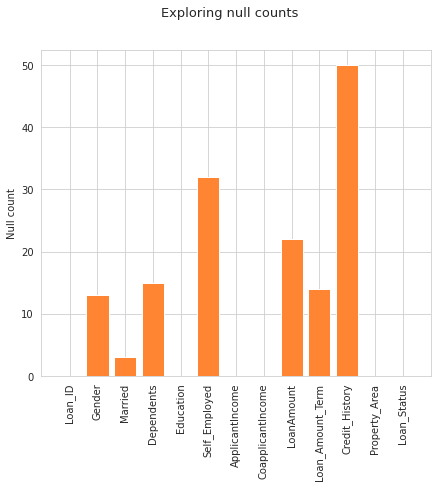

In [11]:
fig, axes = plt.subplots(1)
null_count = []

for col in df.columns:
    null_count.append(df[col].isnull().sum())
    
axes.bar(df.columns, null_count, color= theme_colors[0])

plt.xticks(rotation= 90)
plt.ylabel("Null count")
fig.suptitle("Exploring null counts", fontsize= font)
plt.show()

In [12]:
df_corr = df.apply(lambda x :
    pd.factorize(x)[0]).corr(method='spearman', min_periods=1)

cm = sns.light_palette(theme_colors[1], as_cmap=True)

df_corr.style.background_gradient(cmap= cm)

# We can find from this visualization there is some categorical features
# tricks the heat map like gender and id

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,0.010643,-0.011915,0.051586,0.039442,0.036564,0.813295,0.268943,0.352690,0.058098,0.016315,0.066063,-0.011773
Gender,0.010643,1.000000,-0.354202,-0.164005,-0.027810,-0.041636,-0.012723,-0.195068,0.023923,-0.055177,-0.016876,0.069183,0.010192
Married,-0.011915,-0.354202,1.000000,0.357205,0.019461,0.028345,-0.002094,0.295601,0.014635,0.025162,-0.029229,-0.001634,-0.081335
Dependents,0.051586,-0.164005,0.357205,1.000000,0.043806,0.058607,0.074472,0.015856,0.056391,0.097798,0.015203,-0.003330,-0.013959
Education,0.039442,-0.027810,0.019461,0.043806,1.000000,0.000033,0.071721,0.079733,-0.079726,0.049890,0.039795,-0.005226,0.085884
Self_Employed,0.036564,-0.041636,0.028345,0.058607,0.000033,1.000000,0.010179,-0.078073,0.006195,0.020281,0.051911,0.033406,0.010901
ApplicantIncome,0.813295,-0.012723,-0.002094,0.074472,0.071721,0.010179,1.000000,0.238265,0.325714,0.002665,0.010569,0.078226,-0.021387
CoapplicantIncome,0.268943,-0.195068,0.295601,0.015856,0.079733,-0.078073,0.238265,1.000000,0.125149,0.027053,-0.055467,0.015829,-0.087383
LoanAmount,0.352690,0.023923,0.014635,0.056391,-0.079726,0.006195,0.325714,0.125149,1.000000,0.079183,-0.001893,0.120167,0.034778
Loan_Amount_Term,0.058098,-0.055177,0.025162,0.097798,0.049890,0.020281,0.002665,0.027053,0.079183,1.000000,-0.011357,-0.041723,0.043258


<h4>4- feature engineering

**treating "NAN"s**

In [13]:
df["Gender"] = df["Gender"].fillna("Unkown")
df["Gender"].unique()

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            492 non-null    object 
 1   Gender             492 non-null    object 
 2   Married            492 non-null    object 
 3   Dependents         492 non-null    object 
 4   Education          492 non-null    object 
 5   Self_Employed      492 non-null    object 
 6   ApplicantIncome    492 non-null    int64  
 7   CoapplicantIncome  492 non-null    float64
 8   LoanAmount         492 non-null    float64
 9   Loan_Amount_Term   492 non-null    float64
 10  Credit_History     492 non-null    float64
 11  Property_Area      492 non-null    object 
 12  Loan_Status        492 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 53.8+ KB


In [14]:
df.isnull().sum()

Loan_ID 0
Gender 0
Married 0
Dependents 0
Education 0
Self_Employed 0
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 0
Loan_Amount_Term 0
Credit_History 0
Property_Area 0
Loan_Status 0
dtype: int64

**Simplifying data types**

In [15]:
# We will drop id column becuase it's useless
df = df.drop("Loan_ID", axis= 1)
df.dtypes

Gender object
Married object
Dependents object
Education object
Self_Employed object
ApplicantIncome int64
CoapplicantIncome float64
LoanAmount float64
Loan_Amount_Term float64
Credit_History float64
Property_Area object
Loan_Status object
dtype: object

In [16]:
df["Dependents"] = df["Dependents"].replace({"3+" : 3})

In [17]:
categorical_cols = ["Married", "Gender", "Self_Employed", "Education",
                    "Loan_Status", "Property_Area"]

continous_cols = ["LoanAmount", "Loan_Amount_Term",
                  "ApplicantIncome", "CoapplicantIncome", "Credit_History"]

for col in categorical_cols:
    df[col] = df[col].astype("category")
    
for col in continous_cols:
    df[col] = df[col].astype("int16")

In [18]:
# We will drop id column because it's useless
df.dtypes

Gender category
Married category
Dependents object
Education category
Self_Employed category
ApplicantIncome int16
CoapplicantIncome int16
LoanAmount int16
Loan_Amount_Term int16
Credit_History int16
Property_Area category
Loan_Status category
dtype: object

**One hot encoding for categoricals**

In [19]:
for col in categorical_cols:
    print(f"Unique values of {col} column is : {list(df[col].unique())}")

Unique values of Married column is : ['Yes', 'No']
Unique values of Gender column is : ['Male', 'Female', 'Unkown']
Unique values of Self_Employed column is : ['No', 'Yes']
Unique values of Education column is : ['Graduate', 'Not Graduate']
Unique values of Loan_Status column is : ['N', 'Y']
Unique values of Property_Area column is : ['Rural', 'Urban', 'Semiurban']


In [20]:
def one_hot_encode(data, cols, postfix= "_new") -> pd.DataFrame:
    
    """
    This simple function takes a data frame and
    one hot uncode it's columns.
    
    :returns:the data frame but with one hot encode it
    and replaced it's old categorical cols with new cols
    
    :params:takes the data frame and a list of the categorical 
    column names and takes a post fix to add after the new column
    defualt is : "_new"
    """
    
    global new_cols
    
    new_cols = [col + postfix for col in cols]
    
    for new_col, col in zip(new_cols, cols):
        data[new_col] = data[col].cat.codes
        
    data = data.drop(cols, axis= 1)
    return data

df = one_hot_encode(df, categorical_cols)

In [21]:
for col in new_cols:
    print(f"Unique values for {col} column after "+ \
          f"one hot encoding is: {list(df[col].unique())}")

Unique values for Married_new column after one hot encoding is: [1, 0]
Unique values for Gender_new column after one hot encoding is: [1, 0, 2]
Unique values for Self_Employed_new column after one hot encoding is: [0, 1]
Unique values for Education_new column after one hot encoding is: [0, 1]
Unique values for Loan_Status_new column after one hot encoding is: [0, 1]
Unique values for Property_Area_new column after one hot encoding is: [0, 2, 1]


**Outlier detection with Z-score algorithm**

In [22]:
def z_score(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    """
    This function uses Z-score outlier detection
    method to detect outliers and retrn them in a data frame
    
    :param: Takes a data frame and the column name
    
    :return: list of the outliers you had
    in your data frame
    """
    
    std: np.float16 = np.float16(df[col_name].std())
    mean: np.float16 = np.float16(df[col_name].mean())
    
    upper_limit = mean + (3 * std)
    lower_limit = mean - (3 * std)
    
    outliers_free = [value for value in df[col_name] if 
                  not((value > upper_limit) | (value < lower_limit))]
    

    filtered_data = df.loc[df[col_name].isin(outliers_free)]
    
    
    return filtered_data

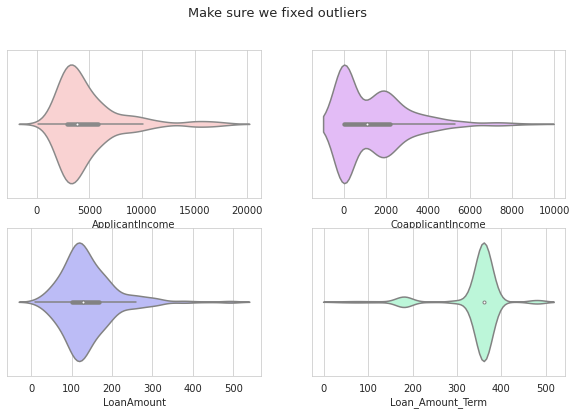

In [23]:
df = z_score(df, "ApplicantIncome")
df = z_score(df, "CoapplicantIncome")

fig, axes = plt.subplots(nrows=2, ncols=2)

sns.violinplot(x =df["LoanAmount"], ax = axes[1,0], color= "#b3b3ff")
sns.violinplot(x= df["Loan_Amount_Term"], ax = axes[1,1], color= "#b3ffd9")
sns.violinplot(x= df["ApplicantIncome"], ax = axes[0,0], color= "#ffcccc")
sns.violinplot(x= df["CoapplicantIncome"], ax = axes[0,1], color= "#e6b3ff")

fig.set_size_inches(10,6)
fig.suptitle("Make sure we fixed outliers", fontsize= font)
plt.show()

<em><strong>In this section we finished the feature engineering & cleaning step<br>
    we will feature select & augment the data in the first sections of EDA

<h2><center><strong>Explartory data analysis (EDA) & Preposessing

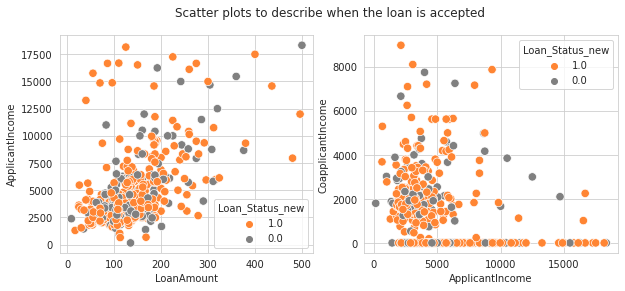

In [24]:
fig, axes = plt.subplots(nrows= 1, ncols= 2)
colors = {1.0: theme_colors[0], 0.0: theme_colors[1]}

sns.scatterplot(x= "ApplicantIncome", y= "CoapplicantIncome",
                hue= "Loan_Status_new", data= df, ax = axes[1],
                hue_order= [1.0, 0.0], palette=colors, s=70)

sns.scatterplot(x= "LoanAmount", y= "ApplicantIncome",
                hue= "Loan_Status_new", data= df,
                ax = axes[0], palette=colors,
                hue_order= [1.0, 0.0], s= 70)

fig.set_size_inches(10, 4)
fig.suptitle("Scatter plots to describe when the loan is accepted")
plt.show()

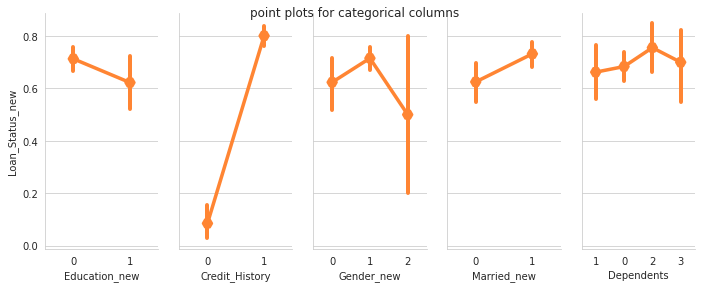

In [25]:
grid = sns.PairGrid(data= df, y_vars="Loan_Status_new",
                 x_vars=["Education_new", "Credit_History", "Gender_new", "Married_new", "Dependents"],
                 height=4, aspect=.5)

grid.map(sns.pointplot, scale=1.3, errwidth=4, color=theme_colors[0], markers= "H", join =True)
grid.fig.suptitle("point plots for categorical columns")
plt.show()

(Loan status):       1 is accepted and 0 is not accepted<br>
(Property area):     rural is 0, semiurban is 1, urban is 2<br>
(Self employed):     0 is no 1 is yes <br>
(Education):         1 is Graduated 0 is Not graduated<br>
(Married):           1 is Married 0 is Not married<br>
(Gender):            1 is Female 0 is Male 2 is Unkown<br>

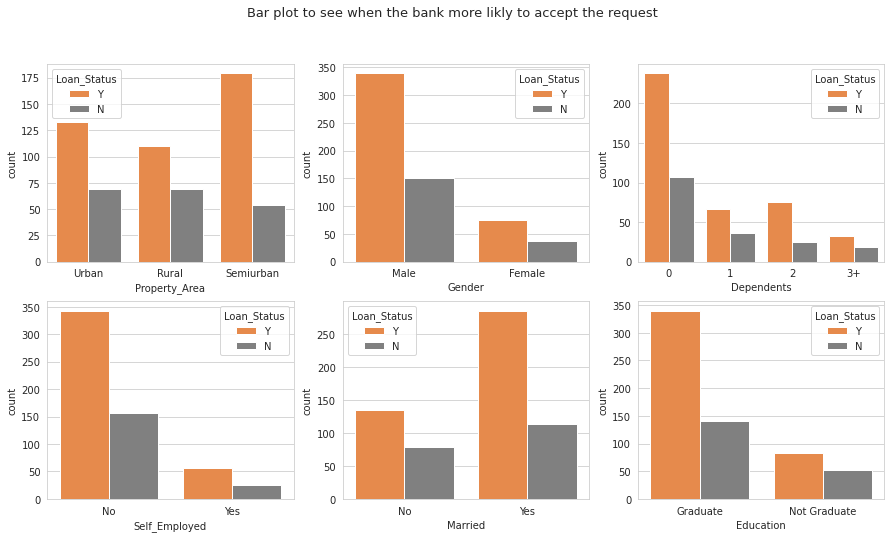

In [26]:
fig, axes = plt.subplots(nrows= 2, ncols= 3)

sns.countplot(data= base_df, x= "Property_Area", hue= "Loan_Status",
              palette= theme_colors, ax = axes[0, 0])

sns.countplot(data= base_df, x= "Gender", hue= "Loan_Status",
              palette= theme_colors, ax = axes[0, 1])

sns.countplot(data= base_df, x= "Married", hue= "Loan_Status",
              palette= theme_colors, ax = axes[1, 1])

sns.countplot(data= base_df, x= "Education", hue= "Loan_Status",
              palette= theme_colors, ax = axes[1, 2])

sns.countplot(data= base_df, x= "Self_Employed", hue= "Loan_Status",
              palette= theme_colors, ax = axes[1, 0])

sns.countplot(data= base_df, x= "Dependents", hue= "Loan_Status",
              palette= theme_colors, ax = axes[0, 2])

fig.set_size_inches(15, 8)
fig.suptitle("Bar plot to see when the bank more likly to accept the request", fontsize= font)
plt.show()

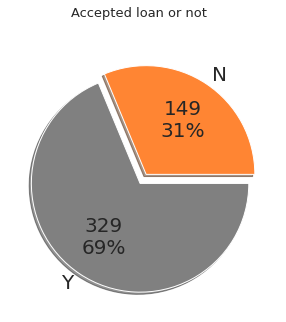

In [27]:
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

spaces = (0.05, 0.05)
label_function = lambda val:  f'{val / 100 * len(df):.0f}\n{val:.0f}%'


base_df.groupby("Loan_Status").size().plot(kind= "pie", autopct=label_function,
                                           textprops={'fontsize': 20},
                                           ax=ax, colors= theme_colors, ylabel= "",
                                           shadow= True, explode= spaces)
fig.suptitle("Accepted loan or not", fontsize= font)
plt.show()

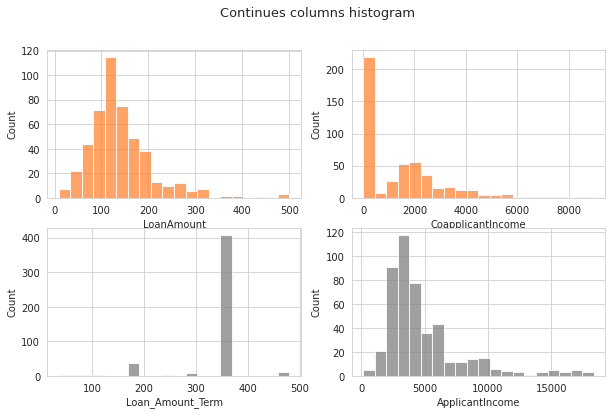

In [28]:
fig, axes = plt.subplots(nrows= 2, ncols= 2)

sns.histplot(data=df, x="CoapplicantIncome", ax= axes[0,1], bins= 20, color= theme_colors[0])
sns.histplot(data=df, x="ApplicantIncome", ax= axes[1,1], bins= 20, color= theme_colors[1])
sns.histplot(data=df, x="LoanAmount", ax= axes[0,0], bins= 20, color= theme_colors[0])
sns.histplot(data=df, x="Loan_Amount_Term", ax= axes[1,0], bins= 20, color= theme_colors[1])

fig.set_size_inches(10, 6)
fig.suptitle("Continues columns histogram", fontsize= font)
plt.show()

From this histogrm we can find that co-applicant income is<br>
about 360 must of time so we will drop it to enchance the<br>
performance of the ML models.

In [29]:
df = df.drop("Loan_Amount_Term", axis= 1)

<h2><strong><center>Analysis conclusions</strong></h2>


<ul>
        <li> <em>The bank doesn't accept the loan request more likly if co-applicant income = 2000
        <li> <em>There is positive correlation between the requsted loan amount and applicant income
        <li> <em>The bank doesn't accept more likly if loan amount between 100K and 200K and applicant income = 2500
        <li> <em>The bank more likly to accept the loan request if you are married.
        <li> <em>You are more likly to get the loan if you are semi urban.
        <li> <em>There is a negative relationship between count of dependents and the chance of your loan be accepted
        <li> <em>The general ratio of getting a loan is <strong>69%</strong>
        <li> <em>The loan request is more likely to be accepted if you are graduated

<h2><center><strong>Machine learning steps

<h4>1- Preprossesing

We will prepeprocess the data with 2 deffrint ways:
<ol>
    <li>First way we will scale the data with Min Max scaling then we will <br>
        radnom oversample the data then normalize it using <strong>log</strong> function<br>
        all of this preprocessing way is for neural networks.
    <li>Secondly we will scale the data using standard scaler for classical<br>
        ML models.

In [30]:
target_col: str = "Loan_Status_new"

continous_cols = ["LoanAmount", "Loan_Amount_Term",
                  "ApplicantIncome", "CoapplicantIncome"]

del continous_cols[1]

In [31]:
mapper = DataFrameMapper([(continous_cols, MinMaxScaler())])

y_ros = df[target_col]
X_ros = mapper.fit_transform(df.copy(), len(continous_cols))
X_ros = pd.DataFrame(X_ros, index=df.index, columns=continous_cols)
X_ros = X_ros.join(df[df.columns.difference(X_ros.columns)]).drop(target_col, axis =1)

In [32]:
print(f"Shape of features before random oversampling: {X_ros.shape}")
X_ros, y_ros = RandomOverSampler().fit_resample(X_ros, y_ros)

print(f"Shape of features after random oversampling: {X_ros.shape}\n")
print(f"is there any nulls after the ROS: \n{X_ros.isnull().sum()}")

Shape of features before random oversampling: (478, 10)
Shape of features after random oversampling: (664, 10)

is there any nulls after the ROS: 
LoanAmount           0
ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education_new        0
Gender_new           0
Married_new          0
Property_Area_new    0
Self_Employed_new    0
dtype: int64


In [33]:
X = pd.DataFrame(StandardScaler().fit_transform(df[continous_cols].values),
                 index= df.index, columns= continous_cols)

X = X.join(df[df.columns.difference(X.columns)]).drop(target_col, axis =1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 1 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanAmount         478 non-null    float64
 1   ApplicantIncome    478 non-null    float64
 2   CoapplicantIncome  478 non-null    float64
 3   Credit_History     478 non-null    int16  
 4   Dependents         478 non-null    object 
 5   Education_new      478 non-null    int8   
 6   Gender_new         478 non-null    int8   
 7   Married_new        478 non-null    int8   
 8   Property_Area_new  478 non-null    int8   
 9   Self_Employed_new  478 non-null    int8   
dtypes: float64(3), int16(1), int8(5), object(1)
memory usage: 38.1+ KB


In [34]:
# Converting dependents column to int8 data type:

X["Dependents"] = X["Dependents"].astype(np.int8)
X_ros["Dependents"] = X_ros["Dependents"].astype(np.int8)

In [35]:
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/5,
                                                    random_state= 432 )

In [36]:
print(f"Train size = {len(X_train)}")
print(f"Test size = {len(X_test)}")

Train size = 382
Test size = 96


X_ros and y_ros is Min max scaled and random over sampeled <em>(we will explain this later)

Standard scaling is a process we use to make the ML training phase easier<br>
by minimyzing the range of the data and here it's theory: $$X\sigma = 1$$ $$X\mu = 0$$

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def model_report(y_true, y_pred):
    
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    print("precision: {:4f}\nrecall: {}\nf1-score: {:4f}\nloss: {:4f}\naccuracy: {:4f}".
          format(pre, rec, f1, loss, acc))

<h4>2- Classic machine learning models

In [38]:
nca = NeighborhoodComponentsAnalysis(n_components= 10)
knn = KNeighborsClassifier(n_neighbors= 25, algorithm= "kd_tree")
random_forest = RandomForestClassifier(max_depth= 3, criterion= "gini")
desision_tree = DecisionTreeClassifier(max_depth= 2, criterion= "entropy")
ada = AdaBoostClassifier()
gussian_nayive = GaussianNB()
regressior = LogisticRegression()
pipe = Pipeline([("nca", nca), ("knn", knn)])

models = {"KNN" : knn, "KNN & NCA" : pipe, "Random forest": random_forest,
          "Desision tree" : desision_tree, "Gussian nayive": gussian_nayive,
          "Logistic regressior" : regressior, "Ada Boost": ada, "SVM" : SVC(),
          "SGD classifier" : SGDClassifier()}

print("*"* 50, "Classic models performance", "*" * 50, "\n")
for mode_name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{mode_name}: ")
    model_report(y_test, y_pred)
    print("=" * 25 + "\n")
    

************************************************** Classic models performance ************************************************** 

KNN: 
precision: 0.684211
recall: 1.0
f1-score: 0.812500
loss: 11.263642
accuracy: 0.687500

KNN & NCA: 
precision: 0.747126
recall: 1.0
f1-score: 0.855263
loss: 8.260004
accuracy: 0.770833

Random forest: 
precision: 0.812500
recall: 1.0
f1-score: 0.896552
loss: 5.631821
accuracy: 0.843750

Desision tree: 
precision: 0.812500
recall: 1.0
f1-score: 0.896552
loss: 5.631821
accuracy: 0.843750

Gussian nayive: 
precision: 0.812500
recall: 1.0
f1-score: 0.896552
loss: 5.631821
accuracy: 0.843750

Logistic regressior: 
precision: 0.812500
recall: 1.0
f1-score: 0.896552
loss: 5.631821
accuracy: 0.843750

Ada Boost: 
precision: 0.805556
recall: 0.8923076923076924
f1-score: 0.846715
loss: 7.884549
accuracy: 0.781250

SVM: 
precision: 0.773810
recall: 1.0
f1-score: 0.872483
loss: 7.133640
accuracy: 0.802083

SGD classifier: 
precision: 0.803279
recall: 0.75384615384

From the cell above we can find that the best three models are <em> (The score is not constant)<em><strong>:</strong>
<ul>
    <li>Gussian nayive
    <li>Logistic regressior
    <li>Desision tree
</ul>
so we will save those models to use later.

In [39]:
import pickle

pickle.dump(gussian_nayive, open("gussian_nayive.h5", "wb"))
pickle.dump(regressior, open("logistic_regressior.h5", "wb"))
pickle.dump(desision_tree, open("desision_tree.h5", "wb"))

In [40]:
base_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
# You can here see will your loan be accepted or not
# loan_id = input("Enter your loan id (or any string this feature is useless):")
# gender = input("Enter your gender ('Male' or 'Female'):")
# married = input("Are you married or not ('Yes' or 'No'):")
# dependents = input("Enter your number of dependents (0, 1, 2, 3+):")
# education = input("Enter your number of dependents (0, 1, 2, 3+):")
# self_employed = input("Are you self employed (Yes or No):")
# applicant_income = input("Enter your applicant income:")
# co_applicant_income = input("Enter your co-applicant income:")
# loan_amount = input("Enter your requsted loan amount in dollar thosands:")
# loan_amount_term = input("Enter your requsted loan amount term in days:")
# credit_history = input("Enter your credit history (0 or 1)")
# property_area = input("Enter your property area ('Rural', 'Urban', 'Semiurban'):")

# new_row = {"Loan_ID":loan_id, "Gender": gender, "Married": married,
#            "Dependents": dependents, "Education":education, "Self_Employed": self_employed,
#            "ApplicantIncome": applicant_income, "CoApplicantIncome": co_applicant_income,
#            "Loan_Amount_Term": loan_amount_term, "Loan_Amount": loan_amount,
#            "Credit_History": credit_history, "Property_Area": property_area,
#            "Loan_Status": np.nan}


# temp_df = base_df.dropna()
# temp_df["Gender"] = temp_df["Gender"].fillna("Unkown")
# temp_df = temp_df.append(new_row, ignore_index = True)

# temp_df = one_hot_encode(temp_df, categorical_cols)

# temp_df = pd.DataFrame(StandardScaler().fit_transform(temp_df[continous_cols].values),
#                  index= temp_df.index, columns= continous_cols)

# temp_df = temp_df.join(base_df[base_df.columns.difference(X.columns)]).drop(target_col, axis =1)

# temp_df.tail()

Here we will use the random over sampled and min max scaled features to<br>
the neural network because it needs too much of data to get us good <br>
predictions.<br><br>
The "Min Max scaling" is just a normalization algorithm like standard scaling<br>
and here is the theory of it : $xnorm_i = \frac{xi.\bar{x}}{max(x)-min(x)}$ 

In [42]:
def plot_history(history):

    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.plot(history.history["accuracy"], label= "Model accuracy", color= theme_colors[0])
    ax1.plot(history.history["val_accuracy"], label= "Valid accuracy", color= theme_colors[1])
    ax1.set_title("model accuracy")
    ax1.set_ylabel("accuracy")
    ax1.set_xlabel("epoch")
    # ax1.set_color_cycle(theme_colors)
    
    ax2.plot(history.history["loss"], label= "Model loss", color= theme_colors[0])
    ax2.plot(history.history["val_loss"], label= "Valid loss", color= theme_colors[1])
    ax2.set_title("model loss", )
    ax2.set_ylabel("loss")
    ax2.set_xlabel("epoch")
    # ax2.set_color_cycle(theme_colors)

    ax1.legend()
    ax2.legend()

    fig.suptitle("Model loss & accuracy", fontsize= font)
    fig.set_size_inches(12, 7)
    plt.show()

We will use three deffrint [**activation functions**]("https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6") for this machine learning model<br><ul>
<li> <strong>RElu</strong>: is a simple activation function I will use for first & third network and here is it's theory:<br>$RElu(x)=max(0, x)$<br><br>

<li><strong>Soft plus</strong>: is like soft RElu function and here is it's theory:<br>
$SoftPlus(x)=log(1+e^x)$<br><br>

<li><strong>Sigmoid</strong>: is a "S" shaped activation function and here is it's theory:<br>
$Sigmoid(x)=\frac{1}{1+e^-x}$

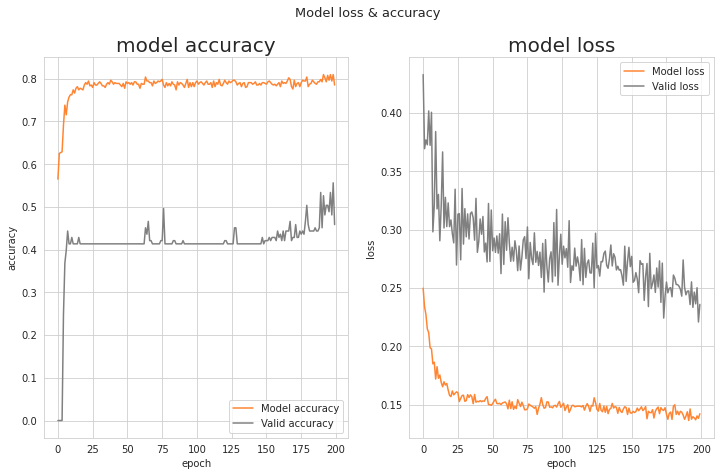

In [43]:
model = keras.Sequential()

model.add(keras.layers.Dense(units= 10,
                                 activation= "relu", input_shape= (10,))) # Input layer
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(units= 16,
                                 activation= "softplus")) # Hidden layer
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(units= 16,
                                 activation= "relu")) # Hidden layer
model.add(keras.layers.Dropout(0.15))

model.add(keras.layers.Dense(units= 1,
                                 activation= "sigmoid")) # Output layer

model.compile(optimizer= keras.optimizers.Adam(0.01), 
                              loss = "mse",
                              metrics= ["accuracy"])
    
# Training the nueral network with the ROS and min max scaled data
history = model.fit(
    X_ros, y_ros,
    epochs= 200,
    validation_split=0.2,
    verbose= 0)

plot_history(history)

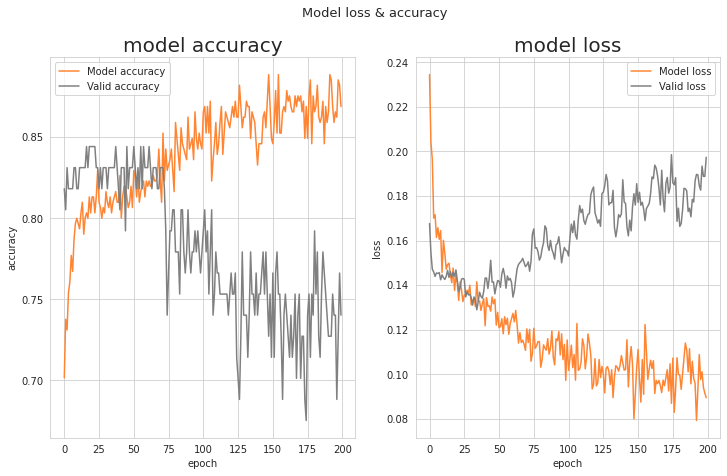

In [44]:
# Training the nueral network but this time with Standard scaled data
history = model.fit(
    X_train, y_train,
    epochs= 200,
    validation_split=0.2,
    verbose= 0)

plot_history(history)

We can see from this visualization that the standard scaling is<br>
better than min max scaling and the accuracy of the neural <br>
network is better than classical models.